In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import json

# 📌 Extracción

In [37]:
json = 'TelecomX_Data.json'
df = pd.read_json(json)
df.head(1)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."


In [38]:
df['account'][0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

#🔧 Transformación

## Expansion de columnas

In [39]:
# 1. Expandir 'customer' 
customer_expanded = pd.json_normalize(df['customer'])
customer_expanded.columns = ['customer_' + col for col in customer_expanded.columns]
df = df.drop(columns='customer').join(customer_expanded)

# 2. Expandir 'phone'
phone_expanded = pd.json_normalize(df['phone'])
phone_expanded.columns = ['phone_' + col for col in phone_expanded.columns]
df = df.drop(columns='phone').join(phone_expanded)

# 3. Expandir 'internet'
internet_expanded = pd.json_normalize(df['internet'])
internet_expanded.columns = ['internet_' + col for col in internet_expanded.columns]
df = df.drop(columns='internet').join(internet_expanded)

# 4. Expandir 'account'
account_expanded = pd.json_normalize(df['account'])
account_expanded.columns = ['account_' + col for col in account_expanded.columns]
df = df.drop(columns='account').join(account_expanded)



df.head(2)




,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


## 

In [40]:
df['account_Charges.Monthly'] = df['account_Charges.Monthly'].astype(float)
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

# 📊 Carga y análisis

In [42]:
df.isnull().sum()

customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges.Monthly       0
account_Charges.Total        11
dtype: int64

In [43]:
df[df['account_Charges.Total'].isnull()]


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [44]:
df[df['customer_tenure']== 0]

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


## Verificacion de cliente 'Churn'

In [45]:
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)  # Porcentajes

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [46]:
df[df['Churn']== '']
# Filtramos solo los clientes que cancelaron y creamos el dataframe churn_df
churn_df = df[df['Churn'] == 'Yes']

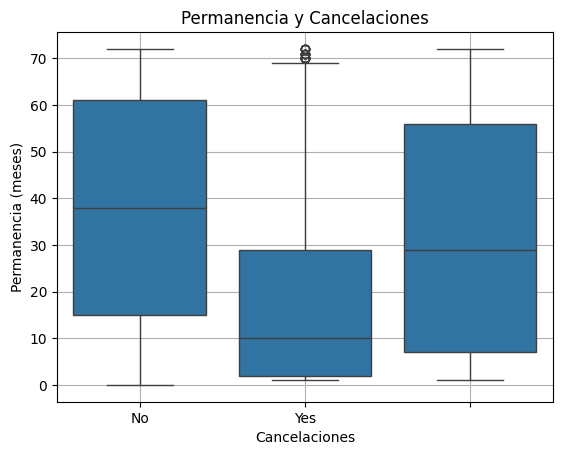

In [47]:
def permanencia_clientes_y_cancelaciones():
  
	sns.boxplot(x='Churn', y='customer_tenure', data=df)
	plt.ylabel('Permanencia (meses)')
	plt.xlabel('Cancelaciones')
	plt.title('Permanencia y Cancelaciones')
	plt.grid()
	return plt

permanencia_clientes_y_cancelaciones().show()

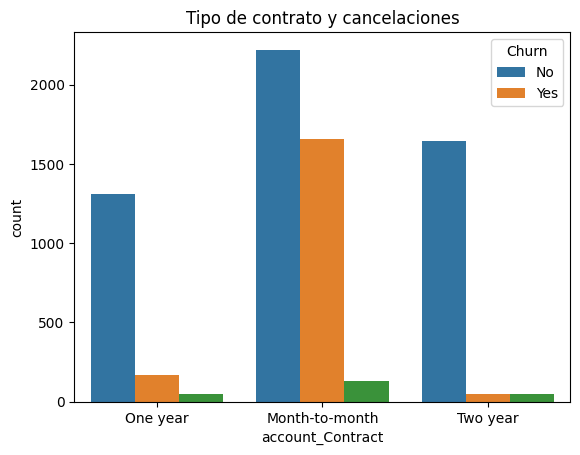

In [48]:
def contratos_y_cancelaciones():
	sns.countplot(x='account_Contract', hue='Churn', data=df)
	plt.title('Tipo de contrato y cancelaciones')
	return plt

contratos_y_cancelaciones().show()

## Cancelaciones y grupos etarios

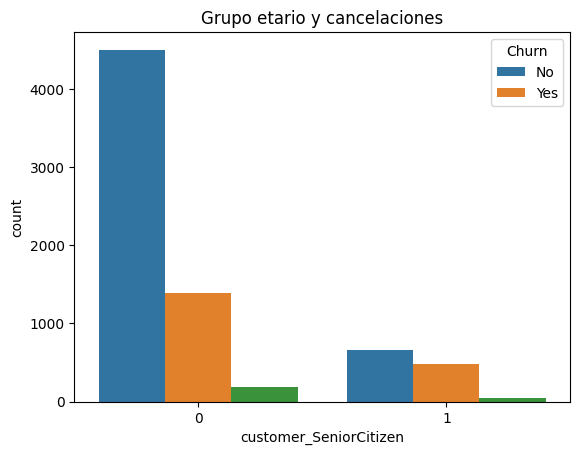

In [49]:
def cancelaciones_por_grupo_etario():
	sns.countplot(x='customer_SeniorCitizen', hue='Churn', data=df)
	plt.title('Grupo etario y cancelaciones')
	return plt

cancelaciones_por_grupo_etario().show()


In [50]:
churn_young = df[(df['Churn'] == 'Yes') & (df['customer_SeniorCitizen'] == 0)]
young = df[df['customer_SeniorCitizen'] == 0]
churn_senior = df[(df['Churn'] == 'Yes') & (df['customer_SeniorCitizen'] == 1)]
senior = df[df['customer_SeniorCitizen'] == 1]
print(f"Total de clientes: {len(df)}")
print(f"Total de clientes jóvenes: {len(young)}")
print(f"Total de clientes mayores: {len(senior)}")
print(f"Churn menores de 65 años: {len(churn_young)}")
print(f"Churn mayores de 65 años: {len(churn_senior)}")
print(f'porcentaje de cancelaciones entre menores de 65 años {(len(churn_young) / len(young)) * 100:.2f}%')
print(f'porcentaje de cancelaciones de mayores de 65 años {(len(churn_senior) / len(senior)) * 100:.2f}%')



Total de clientes: 7267
Total de clientes jóvenes: 6085
Total de clientes mayores: 1182
Churn menores de 65 años: 1393
Churn mayores de 65 años: 476
porcentaje de cancelaciones entre menores de 65 años 22.89%
porcentaje de cancelaciones de mayores de 65 años 40.27%


<module 'matplotlib.pyplot' from '/home/griselda/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

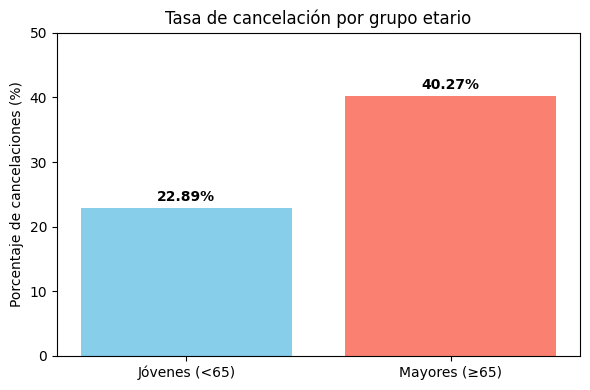

In [51]:
def tasa_cancelacion_grupo_etario():
	# Datos
	grupos = ['Jóvenes (<65)', 'Mayores (≥65)']
	tasas = [22.89, 40.27]

	# Crear gráfico
	plt.figure(figsize=(6, 4))
	plt.bar(grupos, tasas, color=['skyblue', 'salmon'])

	# Títulos y etiquetas
	plt.title('Tasa de cancelación por grupo etario')
	plt.ylabel('Porcentaje de cancelaciones (%)')
	plt.ylim(0, 50)

	# Mostrar porcentaje arriba de las barras
	for i, tasa in enumerate(tasas):
		plt.text(i, tasa + 1, f'{tasa:.2f}%', ha='center', fontweight='bold')

	plt.tight_layout()
	return plt

tasa_cancelacion_grupo_etario()

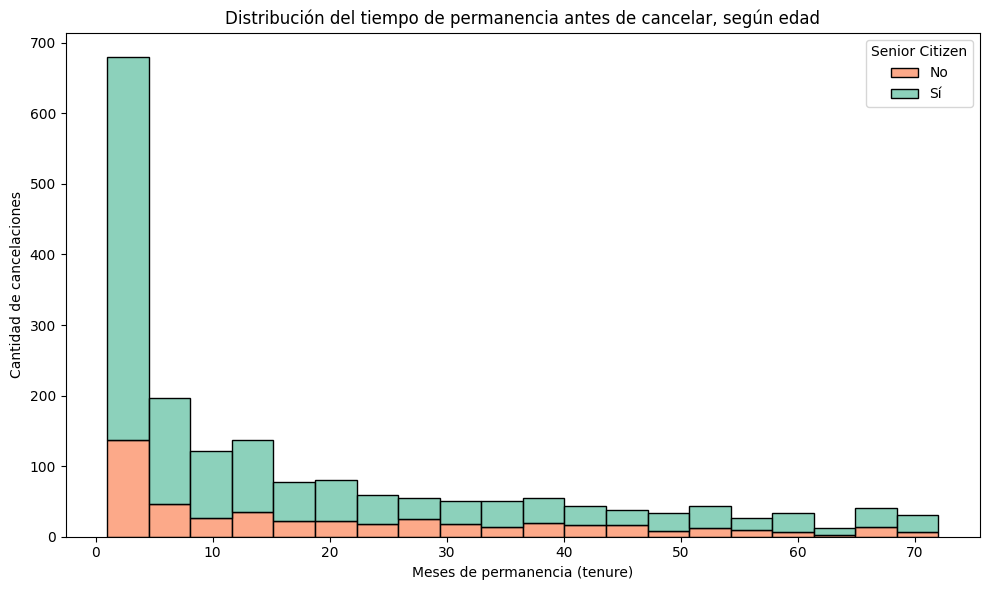

In [52]:
def permanencia_churn_grupo_etario():
	

	# Configuramos el gráfico
	plt.figure(figsize=(10, 6))
	sns.histplot(data=churn_df, x='customer_tenure', hue='customer_SeniorCitizen', multiple='stack', palette='Set2', bins=20)

	plt.title('Distribución del tiempo de permanencia antes de cancelar, según edad')
	plt.xlabel('Meses de permanencia (tenure)')
	plt.ylabel('Cantidad de cancelaciones')
	plt.legend(title='Senior Citizen', labels=['No', 'Sí'])
	plt.tight_layout()
	return plt

permanencia_churn_grupo_etario().show()

<module 'matplotlib.pyplot' from '/home/griselda/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

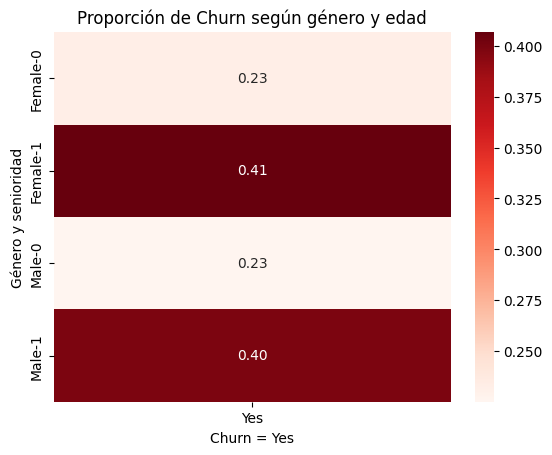

In [53]:
def cancelaciones_grupo_etario_genero():
	pivot = pd.crosstab(index=[df['customer_gender'], df['customer_SeniorCitizen']], columns=df['Churn'])
	pivot_ratio = pivot.div(pivot.sum(axis=1), axis=0)

	sns.heatmap(pivot_ratio[['Yes']], annot=True, cmap='Reds', fmt=".2f")
	plt.title('Proporción de Churn según género y edad')
	plt.ylabel('Género y senioridad')
	plt.xlabel('Churn = Yes')
	return plt

cancelaciones_grupo_etario_genero()

## Cancelaciones y composición de grupo de la clientela

In [54]:
client_couple = churn_df[churn_df['customer_Partner']== 'Yes']
client_parent = churn_df[churn_df['customer_Dependents']== 'Yes']
print(f'Sobre un total de {len(churn_df)} cancelaciones, {len(client_couple)} son clientes con pareja que representan el {len(client_couple)/len(churn_df)*100:.2f}% ')
print(f'Sobre un total de {len(churn_df)} cancelaciones, {len(client_parent)} son clientes jefe de familiaque representan el {len(client_parent)/len(churn_df)*100:.2f}% ')

Sobre un total de 1869 cancelaciones, 669 son clientes con pareja que representan el 35.79% 
Sobre un total de 1869 cancelaciones, 326 son clientes jefe de familiaque representan el 17.44% 


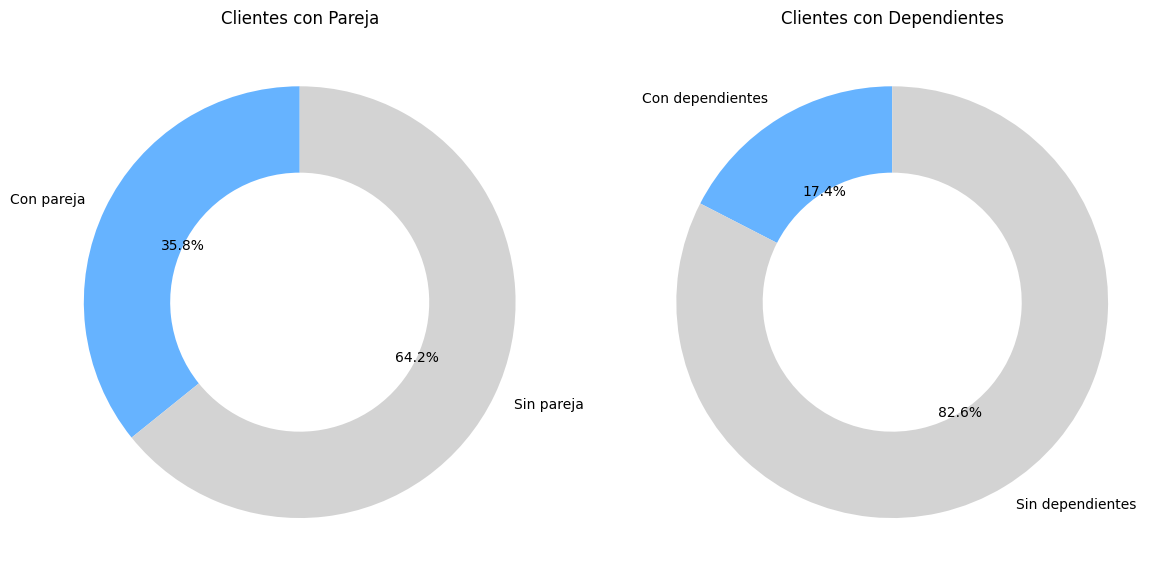

In [55]:
def composicion_cliente():
	# Datos
	labels_partner = ['Con pareja', 'Sin pareja']
	sizes_partner = [len(client_couple), len(churn_df) - len(client_couple)]

	labels_dependents = ['Con dependientes', 'Sin dependientes']
	sizes_dependents = [len(client_parent), len(churn_df) - len(client_parent)]

	# Colores personalizados (opcional)
	colors = ['#66b3ff', '#d3d3d3']

	# Graficar
	fig, axes = plt.subplots(1, 2, figsize=(12, 6))

	# Pareja
	axes[0].pie(sizes_partner, labels=labels_partner, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})
	axes[0].set_title('Clientes con Pareja')

	# Dependientes
	axes[1].pie(sizes_dependents, labels=labels_dependents, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})
	axes[1].set_title('Clientes con Dependientes')

	plt.tight_layout()
	return plt

composicion_cliente().show()

## Cancelaciones y servicios contratados

Clientes exclusivos de internet que cancelaron: 170 y representan el 9.10% del total de cancelaciones
Clientes exclusivos de telefonía que cancelaron: 113 y representan el 6.05% del total de cancelaciones
Total de clientes que cancelaron: 1869


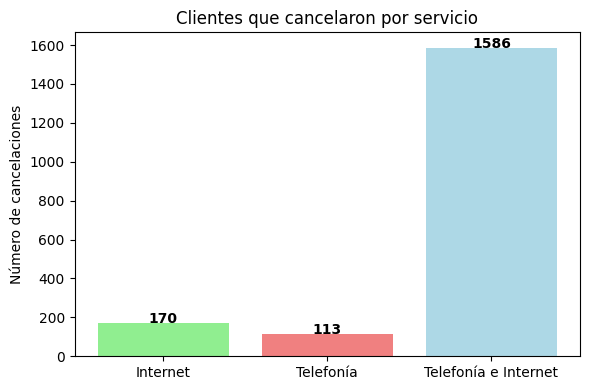

In [56]:
churn_internet = df[(df['Churn'] == 'Yes') & (df['phone_PhoneService'] == "No")].copy()
churn_phone = df[(df['Churn'] == 'Yes') & (df['internet_InternetService'] == "No")].copy()
churn_total = df[df['Churn'] == 'Yes'].copy()
churn_rest = df[(df['Churn'] == 'Yes') & (df['phone_PhoneService'] == "Yes") & (df['internet_InternetService'] != "No")].copy()

print(f'Clientes exclusivos de internet que cancelaron: {len(churn_internet)} y representan el {(len(churn_internet) / len(churn_total)) * 100:.2f}% del total de cancelaciones')
print(f'Clientes exclusivos de telefonía que cancelaron: {len(churn_phone)} y representan el {(len(churn_phone) / len(churn_total)) * 100:.2f}% del total de cancelaciones')
print(f'Total de clientes que cancelaron: {len(churn_total)}')

def clientes_y_servicios_cancelados():
	# Datos
	grupos = ['Internet', 'Telefonía', 'Telefonía e Internet']
	tasas = [len(churn_internet), len(churn_phone), len(churn_rest)]
	# Crear gráfico
	plt.figure(figsize=(6, 4))
	plt.bar(grupos, tasas, color=['lightgreen', 'lightcoral', 'lightblue'])
	# Títulos y etiquetas
	plt.title('Clientes que cancelaron por servicio')
	plt.ylabel('Número de cancelaciones')
	# Mostrar número de cancelaciones arriba de las barras  
	for i, tasa in enumerate(tasas):
			plt.text(i, tasa + 1, f'{tasa}', ha='center', fontweight='bold')
	plt.tight_layout()
	return plt

clientes_y_servicios_cancelados().show()


### Servicios de Internet contratados entre las cancelaciones

Clientes con Churn que solo tenían Internet y ningún servicio adicional: 40 / 170
Eso es el 23.53%
Clientes con Churn que no contrataban ningún servicio adicional: 374 / 1586
Eso es el 23.58%
Clientes con Churn que no contrataban ningún servicio adicional: 527 / 1869
Eso es el 28.20%


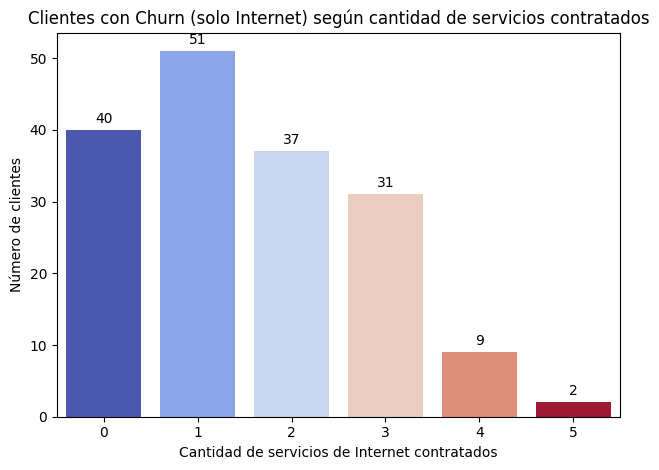

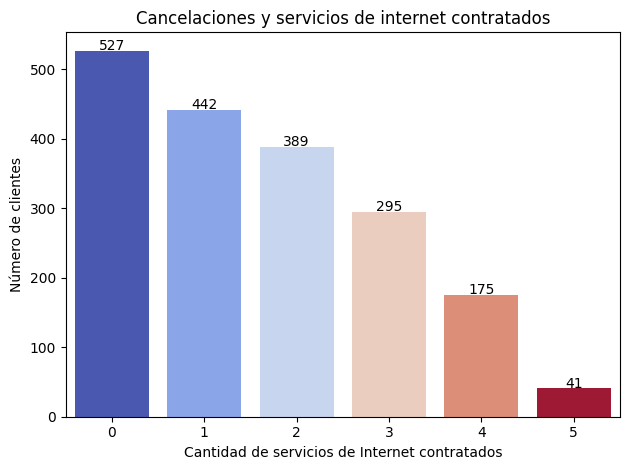

In [57]:
# Columnas de servicios
internet_services = ['internet_OnlineBackup', 'internet_DeviceProtection',
											'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies']

def cantidad_servicios_internet_y_cancelaciones_solo_internet():

	# Crear una columna que cuenta cuántos "Yes" tiene cada fila
	churn_internet['num_services_yes'] = churn_internet[internet_services].apply(lambda row: (row == 'Yes').sum(), axis=1)

	# Ver cuántos clientes tenían CERO servicios contratados
	no_services_count = (churn_internet['num_services_yes'] == 0).sum()
	total_churn_internet = churn_internet.shape[0]

	print(f"Clientes con Churn que solo tenían Internet y ningún servicio adicional: {no_services_count} / {total_churn_internet}")
	print(f"Eso es el {no_services_count / total_churn_internet * 100:.2f}%")


	# Crear una columna que cuenta cuántos "Yes" tiene cada fila
	churn_rest['num_services_yes'] = churn_rest[internet_services].apply(lambda row: (row == 'Yes').sum(), axis=1)

	# Ver cuántos clientes tenían CERO servicios contratados
	no_services_count_rest = (churn_rest['num_services_yes'] == 0).sum()
	total_churn_rest = churn_rest.shape[0]

	# Crear una columna que cuenta cuántos "Yes" tiene cada fila
	churn_total['num_services_yes'] = churn_total[internet_services].apply(lambda row: (row == 'Yes').sum(), axis=1)

	# Ver cuántos clientes tenían CERO servicios contratados
	no_services_count_total = (churn_total['num_services_yes'] == 0).sum()
	total_churn_total = churn_total.shape[0]

	print(f"Clientes con Churn que no contrataban ningún servicio adicional: {no_services_count_rest} / {total_churn_rest}")
	print(f"Eso es el {no_services_count_rest / total_churn_rest * 100:.2f}%")

	# Histograma de cantidad de servicios contratados (0 a 5)
	ax = sns.countplot(data=churn_internet, x='num_services_yes', hue='num_services_yes', palette='coolwarm', legend=False)
	plt.title('Clientes con Churn (solo Internet) según cantidad de servicios contratados')
	plt.xlabel('Cantidad de servicios de Internet contratados')
	plt.ylabel('Número de clientes')
	plt.tight_layout()

	for p in ax.patches:
			height = p.get_height()
			ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center")
	print(f"Clientes con Churn que no contrataban ningún servicio adicional: {no_services_count_total} / {total_churn_total}")
	print(f"Eso es el {no_services_count_total / total_churn_total * 100:.2f}%")
	return plt
	
cantidad_servicios_internet_y_cancelaciones_solo_internet().show()



def cantidad_servicios_internet_y_cancelaciones():
	# Histograma de cantidad de servicios contratados (0 a 5)
	ax = sns.countplot(data=churn_total, x='num_services_yes', hue='num_services_yes', palette='coolwarm', legend=False)
	plt.title('Cancelaciones y servicios de internet contratados')
	plt.xlabel('Cantidad de servicios de Internet contratados')
	plt.ylabel('Número de clientes')
	plt.tight_layout()

	for p in ax.patches:
			height = p.get_height()
			ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center")

	return plt

cantidad_servicios_internet_y_cancelaciones().show()



internet_StreamingMovies     72
internet_StreamingTV         64
internet_OnlineBackup        51
internet_DeviceProtection    49
internet_TechSupport         28
dtype: int64


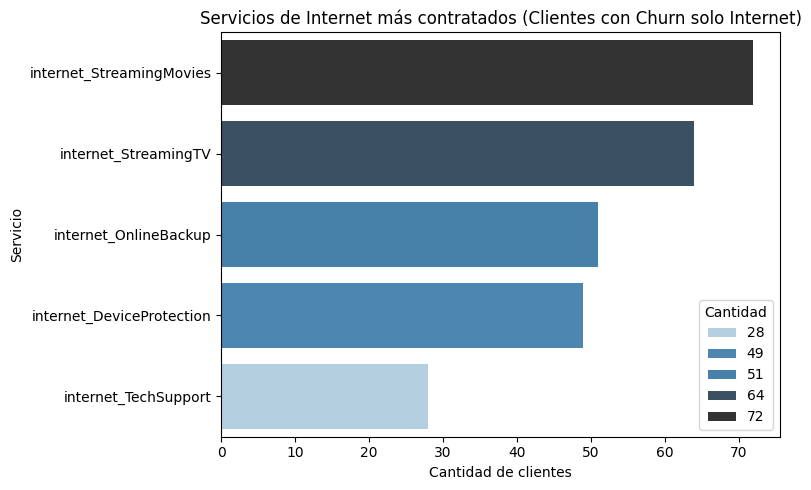

In [58]:
def servicios_clientes_solo_internet():
	# Contar cuántos clientes contrataron cada servicio
	service_counts = (churn_internet[internet_services] == 'Yes').sum().sort_values(ascending=False)

	# Mostrar los resultados
	print(service_counts)

	# Convertir a DataFrame para graficar
	service_counts_df = service_counts.reset_index()
	service_counts_df.columns = ['Servicio', 'Cantidad']

	# Gráfico de barras
	plt.figure(figsize=(8, 5))
	sns.barplot(data=service_counts_df, x='Cantidad', y='Servicio', hue= 'Cantidad',palette='Blues_d')
	plt.title('Servicios de Internet más contratados (Clientes con Churn solo Internet)')
	plt.xlabel('Cantidad de clientes')
	plt.ylabel('Servicio')
	plt.tight_layout()
	return plt

servicios_clientes_solo_internet().show()

internet_StreamingMovies     818
internet_StreamingTV         814
internet_DeviceProtection    545
internet_OnlineBackup        523
internet_TechSupport         310
dtype: int64


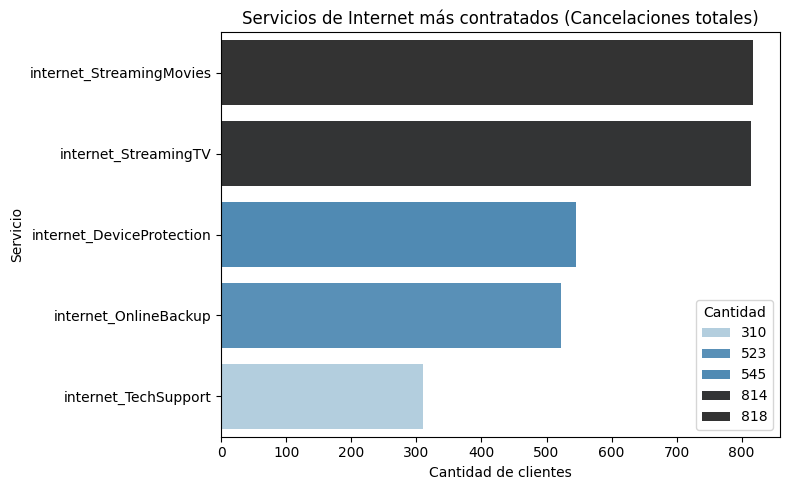

In [59]:
def servicios_contratados_y_cancelaciones():
	# Contar cuántos clientes contrataron cada servicio
	service_counts = (churn_total[internet_services] == 'Yes').sum().sort_values(ascending=False)

	# Mostrar los resultados
	print(service_counts)

	# Convertir a DataFrame para graficar
	service_counts_df = service_counts.reset_index()
	service_counts_df.columns = ['Servicio', 'Cantidad']

	# Gráfico de barras
	plt.figure(figsize=(8, 5))
	sns.barplot(data=service_counts_df, x='Cantidad', y='Servicio', hue= 'Cantidad',palette='Blues_d')
	plt.title('Servicios de Internet más contratados (Cancelaciones totales)')
	plt.xlabel('Cantidad de clientes')
	plt.ylabel('Servicio')
	plt.tight_layout()
	return plt
	
servicios_contratados_y_cancelaciones().show()


In [60]:
# Filtrar clientes que contrataron solo 1 servicio de Internet
solo_un_servicio = churn_internet[churn_internet['num_services_yes'] == 1]

# Para cada fila, obtener el nombre del servicio contratado (el que tiene 'Yes')
servicio_contratado = solo_un_servicio[internet_services].apply(
    lambda row: row[row == 'Yes'].index[0], axis=1
)

# Contar cuál fue el servicio único contratado más frecuente
servicio_counts = servicio_contratado.value_counts()

# Mostrar resultados
print(servicio_counts)


internet_StreamingMovies     15
internet_OnlineBackup        14
internet_TechSupport          9
internet_StreamingTV          8
internet_DeviceProtection     5
Name: count, dtype: int64


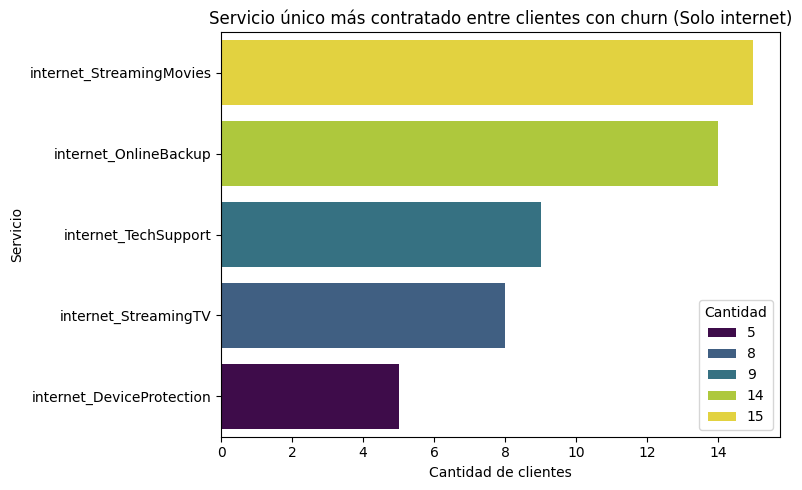

In [61]:
def servicio_unico_clientes_solo_internet():
	servicio_counts_df = servicio_counts.reset_index()
	servicio_counts_df.columns = ['Servicio', 'Cantidad']

	plt.figure(figsize=(8, 5))
	sns.barplot(data=servicio_counts_df, x='Cantidad', y='Servicio', hue='Cantidad',palette='viridis')
	plt.title('Servicio único más contratado entre clientes con churn (Solo internet)')
	plt.xlabel('Cantidad de clientes')
	plt.ylabel('Servicio')
	plt.tight_layout()
	return plt

servicio_unico_clientes_solo_internet().show()

internet_StreamingMovies     128
internet_StreamingTV         115
internet_OnlineBackup         99
internet_DeviceProtection     62
internet_TechSupport          38
Name: count, dtype: int64


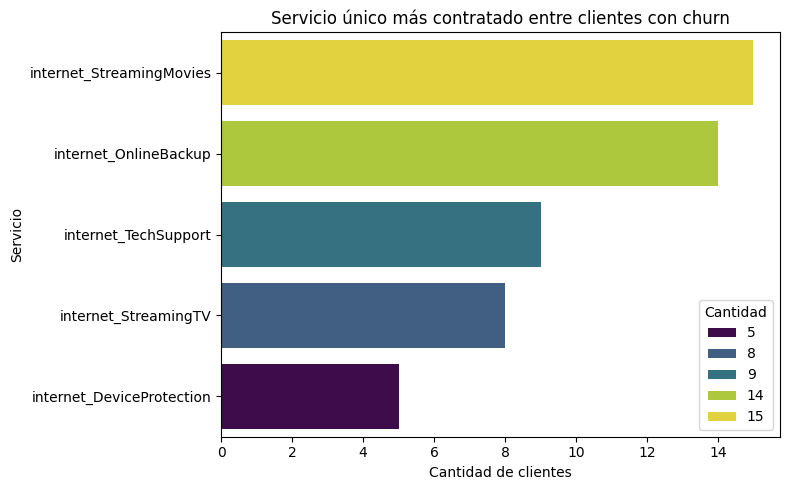

In [62]:
def servicio_unico_total_cancelaciones():	
	# Filtrar clientes que contrataron solo 1 servicio de Internet
	solo_un_servicio = churn_total[churn_total['num_services_yes'] == 1]

	# Para cada fila, obtener el nombre del servicio contratado (el que tiene 'Yes')
	servicio_contratado = solo_un_servicio[internet_services].apply(
			lambda row: row[row == 'Yes'].index[0], axis=1
	)

	# Contar cuál fue el servicio único contratado más frecuente
	servicio_counts_total = servicio_contratado.value_counts()

	# Mostrar resultados
	print(servicio_counts_total)

	servicio_counts_total_df = servicio_counts.reset_index()
	servicio_counts_total_df.columns = ['Servicio', 'Cantidad']

	plt.figure(figsize=(8, 5))
	sns.barplot(data=servicio_counts_total_df, x='Cantidad', y='Servicio', hue='Cantidad',palette='viridis')
	plt.title('Servicio único más contratado entre clientes con churn')
	plt.xlabel('Cantidad de clientes')
	plt.ylabel('Servicio')
	plt.tight_layout()
	return plt
	
servicio_unico_total_cancelaciones().show()

### Servicios adicionales y cancelaciones

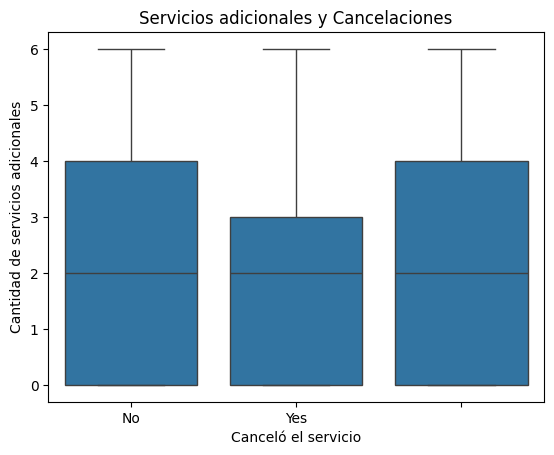

In [63]:
def distribucion_servicios_cancelaciones():
	# Contamos cuántos servicios adicionales tiene cada cliente
	service_cols = ['internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies']
	df['NumServiciosAdicionales'] = df[service_cols].apply(lambda row: sum(row == 'Yes'), axis=1)

	# Boxplot del número de servicios adicionales por churn
	sns.boxplot(x='Churn', y='NumServiciosAdicionales', data=df)
	plt.title('Servicios adicionales y Cancelaciones')
	plt.xlabel('Canceló el servicio')
	plt.ylabel('Cantidad de servicios adicionales')
	return plt

distribucion_servicios_cancelaciones().show()

### Servicios de Telefonía y cancelaciones

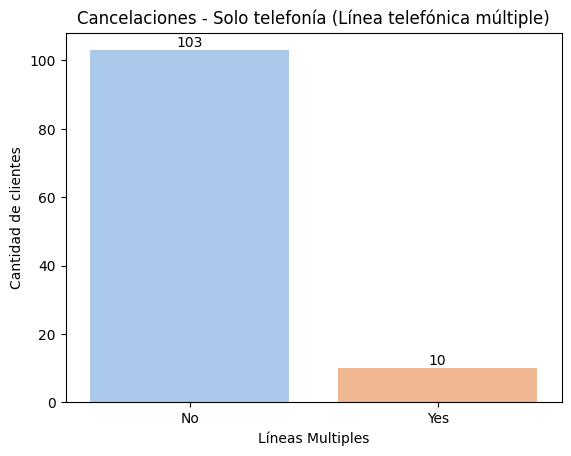

In [64]:
def cancelaciones_lineas_telefonia():
	ax = sns.countplot(data=churn_phone, x='phone_MultipleLines', hue='phone_MultipleLines', palette='pastel')
	plt.title('Cancelaciones - Solo telefonía (Línea telefónica múltiple)')
	plt.xlabel('Líneas Multiples')
	plt.ylabel('Cantidad de clientes')
	for p in ax.patches:
			height = p.get_height()
			ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center")
	return plt
	
	
cancelaciones_lineas_telefonia().show()

In [65]:
churn_phone['phone_MultipleLines'].value_counts()

phone_MultipleLines
No     103
Yes     10
Name: count, dtype: int64

In [66]:
(churn_phone['phone_MultipleLines'].value_counts(normalize=True) * 100).round(2)

phone_MultipleLines
No     91.15
Yes     8.85
Name: proportion, dtype: float64

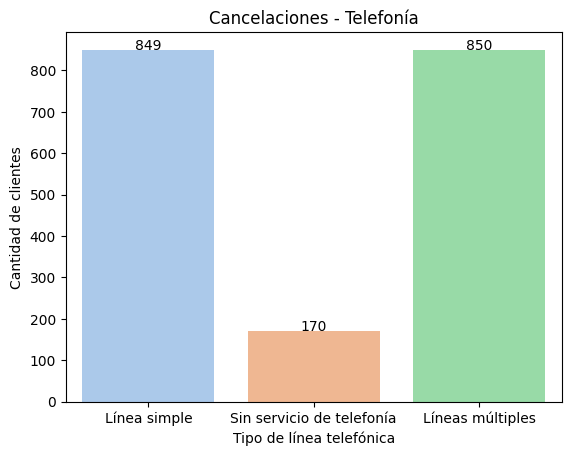

In [67]:
def cancelaciones_totales_telefonia():
	churn_total['tipo_linea'] = churn_total['phone_MultipleLines'].map({
			'Yes': 'Líneas múltiples',
			'No': 'Línea simple',
			'No phone service': 'Sin servicio de telefonía'
	})

	# Graficamos con la nueva columna
	ax = sns.countplot(data=churn_total, x='tipo_linea', palette='pastel', hue='tipo_linea')

	# Títulos y etiquetas
	plt.title('Cancelaciones - Telefonía')
	plt.xlabel('Tipo de línea telefónica')
	plt.ylabel('Cantidad de clientes')

	# Mostrar los valores encima de cada barra
	for p in ax.patches:
			height = p.get_height()
			ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center")

	return plt

cancelaciones_totales_telefonia().show()

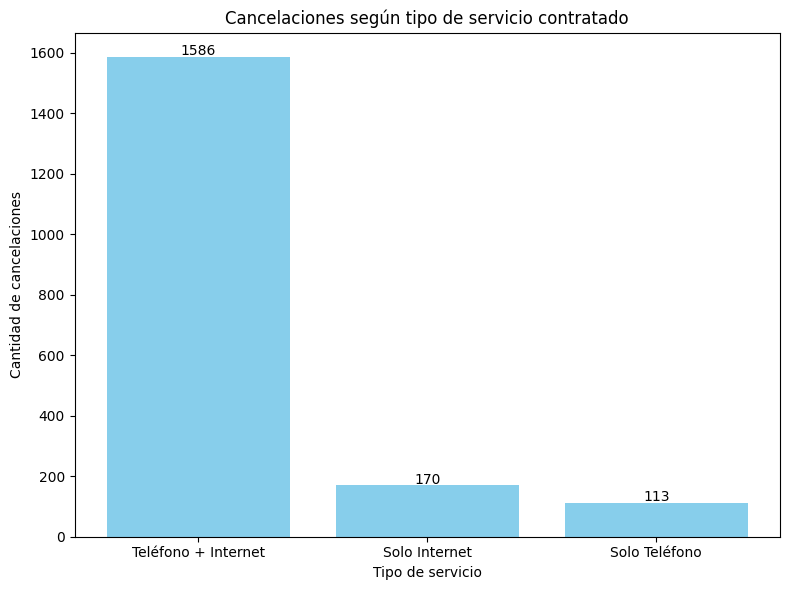

In [68]:


def cancelaciones_totales_servicio():
	# Clasificamos a cada cliente según el tipo de servicio contratado
	def clasificar_servicio(row):
			if row['internet_InternetService'] != 'No' and row['phone_PhoneService'] == 'No':
					return 'Solo Internet'
			elif row['internet_InternetService'] == 'No' and row['phone_PhoneService'] == 'Yes':
					return 'Solo Teléfono'
			elif row['internet_InternetService'] != 'No' and row['phone_PhoneService'] == 'Yes':
					return 'Teléfono + Internet'
			else:
					return 'Ninguno'

	# Aplicamos la clasificación
	churn_total['tipo_servicio'] = churn_total.apply(clasificar_servicio, axis=1)

	# Conteo por categoría
	conteo_servicios = churn_total['tipo_servicio'].value_counts()

	# Graficamos
	plt.figure(figsize=(8, 6))
	bars = plt.bar(conteo_servicios.index, conteo_servicios.values, color='skyblue')
	plt.title('Cancelaciones según tipo de servicio contratado')
	plt.xlabel('Tipo de servicio')
	plt.ylabel('Cantidad de cancelaciones')

	# Añadimos etiquetas
	for bar in bars:
			yval = bar.get_height()
			plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center')

	plt.tight_layout()
	return plt


cancelaciones_totales_servicio().show()


## Métodos de pago y canceaciones

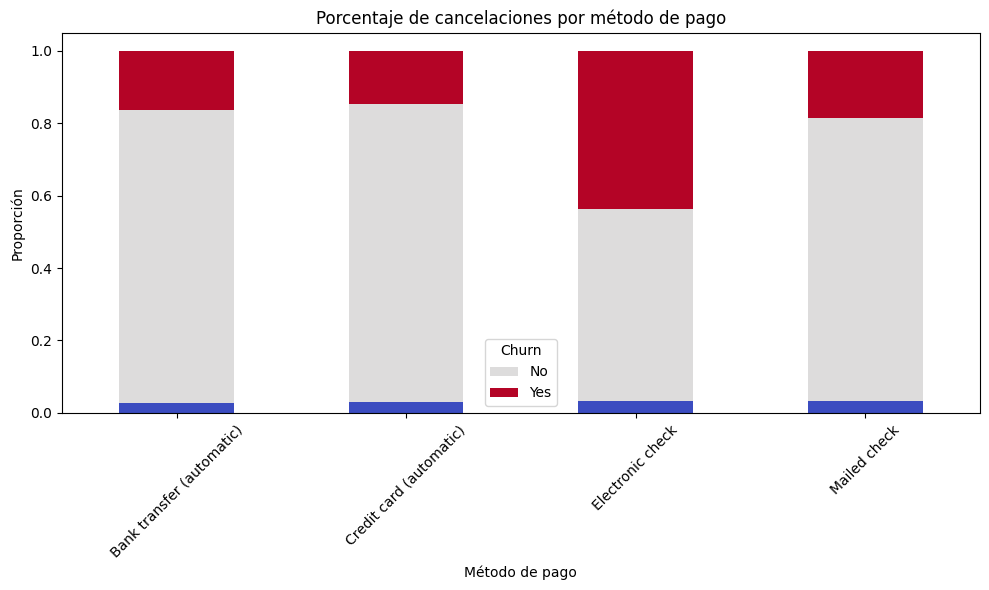

In [69]:

def cancelaciones_metodo_pago():
	# Gráfico de porcentaje de cancelaciones por método de pago
	payment_churn = df.groupby('account_PaymentMethod')['Churn'].value_counts(normalize=True).unstack().fillna(0)

	payment_churn.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
	plt.title('Porcentaje de cancelaciones por método de pago')
	plt.ylabel('Proporción')
	plt.xlabel('Método de pago')
	plt.legend(title='Churn')
	plt.xticks(rotation=45)
	plt.tight_layout()
	return plt
	
cancelaciones_metodo_pago().show()


## Tipo de facturación y cancelaciones

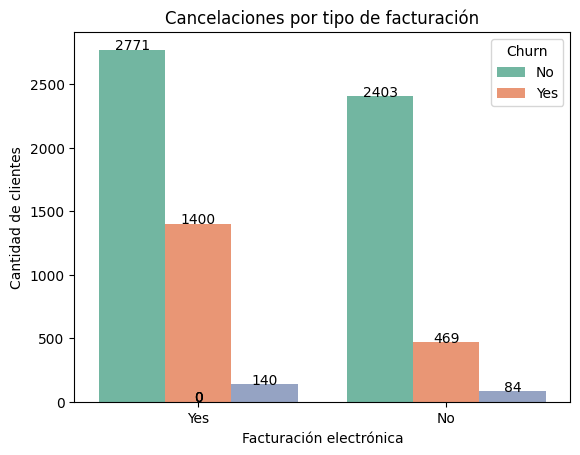

In [70]:
def cancelaciones_tipo_facturacion():
	# Gráfico de barras agrupado por tipo de facturación y cancelación
	ax = sns.countplot(data=df, x='account_PaperlessBilling', hue='Churn', palette='Set2')
	plt.title('Cancelaciones por tipo de facturación')
	plt.xlabel('Facturación electrónica')
	plt.ylabel('Cantidad de clientes')

	for p in ax.patches:
			height = p.get_height()
			ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height), ha="center")

	return plt

cancelaciones_tipo_facturacion().show()

In [71]:
df[(df['account_PaperlessBilling'] == 'Yes') & (df['Churn'] == 'Yes')]['account_Contract'].value_counts()


account_Contract
Month-to-month    1249
One year           118
Two year            33
Name: count, dtype: int64

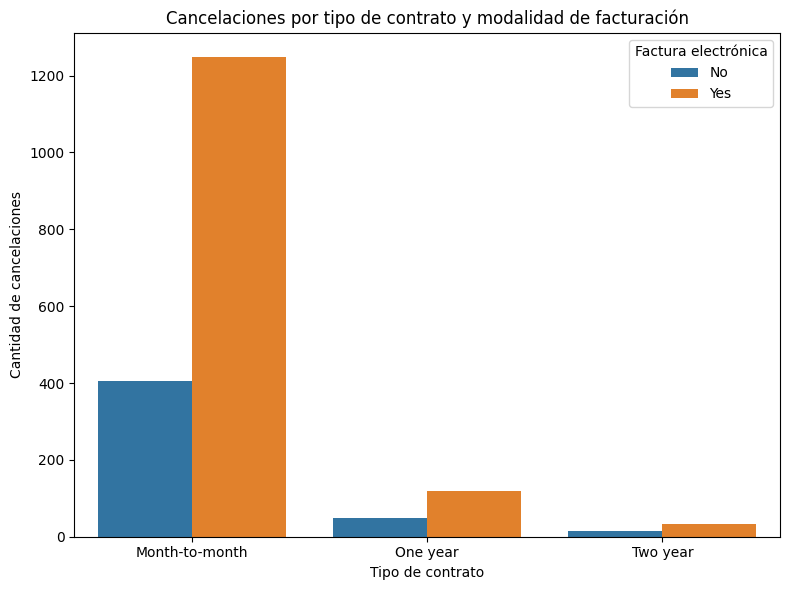

In [72]:
def cancelaciones_contrato_facturacion():
	# Filtrar sólo los que cancelaron
	df_churn = df[df['Churn'] == 'Yes']

	# Agrupar por tipo de contrato y factura electrónica
	grouped = df_churn.groupby(['account_Contract', 'account_PaperlessBilling']).size().reset_index(name='count')

	# Gráfico
	plt.figure(figsize=(8,6))
	sns.barplot(data=grouped, x='account_Contract', y='count', hue='account_PaperlessBilling')
	plt.title('Cancelaciones por tipo de contrato y modalidad de facturación')
	plt.xlabel('Tipo de contrato')
	plt.ylabel('Cantidad de cancelaciones')
	plt.legend(title='Factura electrónica')
	plt.tight_layout()
	return plt

cancelaciones_contrato_facturacion().show()

#📄Informe final

En un primer análisis, llamó la atención la presencia de valores nulos en la columna de cargos totales. Al examinar esas filas, se observó que todas tienen un valor de 0 en la columna tenure. Esto sugiere que se trata de clientes recientemente incorporados, a quienes aún no se les ha facturado ningún importe. Esta hipótesis se refuerza al notar que ninguno de estos casos presenta un valor afirmativo en la columna Churn.

Por otra parte, se detectaron 224 registros sin valores en la columna Churn. En estos casos, no es posible extraer conclusiones claras, ya que todos presentan un tenure distinto de cero, cuentan con un contrato activo y poseen valores registrados en los cargos totales. Todo indica que se trata simplemente de datos que no fueron correctamente cargados.

El análisis del diagrama de caja evidencia que la tasa de cancelación es más alta durante los primeros meses de permanencia, con una mediana cercana a los 10 meses. Los casos de cancelación entre clientes de alta antigüedad son poco frecuentes, mientras que quienes permanecen tienden a mantener una relación prolongada con la empresa. Esto sugiere que el riesgo de churn es mayor durante los primeros meses, por lo que sería recomendable implementar estrategias de fidelización específicas para clientes nuevos.

En cuanto al tipo de contrato, el gráfico de barras muestra que la mayoría de las cancelaciones se producen entre quienes tienen contratos mensuales. Esto podría reflejar una baja disposición a comprometerse con planes de mayor duración, posiblemente debido a precios poco competitivos o a una percepción de escaso valor agregado. Además, se observa que el servicio con mayor cantidad de cancelaciones es el de internet por fibra óptica, lo cual resulta llamativo dado que se trata de una tecnología avanzada. Las posibles causas podrían incluir:

* Costos elevados;

* Problemas de calidad o atención;

* Experiencias negativas no reflejadas directamente en los datos.

El análisis por edad revela que, aunque los menores de 65 años representan la mayoría de las cancelaciones en términos absolutos, su proporción relativa es inferior, ya que representan el 22% de los cancelamientos, frente al 40% correspondiente a personas mayores de esa edad. 
Respecto al genero, se puede decir que no influyen en las cancelaciones. En ambos grupos etarios, se reflejan las mismas proporciones para cada genero.

Si nos enfocamos en la composición de la clientela, encontramos que de las cancelaciones un 35,8% corresponde a clientes en pareja mientras que un 17.4 corresponde a clientes que son cabeza de familia. Probablemente pueda hacerse promociones puntuales a fin de evitar la cancelación

Del total de cancelaciones, un 9% corresponde a usuarios que solo contrataron servicios de internet, mientras que un 6% eran usuarios exclusivos de telefonía. Al examinar a los clientes que solo contaban con internet, se observa que el 53% contrató uno o ningún servicio adicional. Esta tendencia también se replica en el total de cancelaciones, donde el 51% de los clientes tenían entre 0 y 1 servicios complementarios.

Dentro del grupo de usuarios de internet, tanto en los casos exclusivos como en el total de cancelaciones, los servicios más contratados fueron los de streaming, ya sea de TV o de películas. Al enfocar el análisis en aquellos clientes que contrataron un único servicio adicional, se destacan el streaming de películas y el respaldo en la nube (Online Backup) como los más elegidos por quienes solo tenían internet. Esta tendencia también se refleja en el total de cancelaciones.

Estos resultados sugieren que los servicios de streaming y backup en la nube poseen un alto valor percibido por los clientes. Diseñar promociones, paquetes o estrategias de retención centradas en estos servicios podría contribuir significativamente a reducir la tasa de cancelación.

El diagrama de caja Servicios adicionales vs Churn sugiere que a mayor cantidad de servicios adicionales contratados, menor es la probabilidad de que un cliente cancele el servicio. Es decir, los servicios adicionales parecen aumentar la retención de clientes.

En el caso de los clientes que solo contrataron servicios de telefonía y cancelaron el servicio, se observa que el 91% (103 de 113) contaban con una única línea, mientras que solo el 9% (10 de 113) tenían líneas múltiples. Esto sugiere que los clientes con múltiples líneas podrían estar más fidelizados o comprometidos, posiblemente debido a beneficios adicionales, descuentos por volumen o una mayor necesidad del servicio. Sería recomendable investigar las diferencias en términos de retención entre estos dos grupos.

Se observa una clara relación entre el método de pago y la probabilidad de cancelación. Los clientes que utilizan pagos automáticos (ya sea por transferencia bancaria o tarjeta de crédito) tienen tasas de cancelación significativamente menores. Por el contrario, los que pagan mediante electronic check presentan la tasa de churn más alta. Esto sugiere que fomentar los métodos de pago automáticos podría ser una estrategia eficaz para mejorar la retención de clientes.

Al analizar la relación entre la cancelación del servicio y la modalidad de facturación, se observa que la gran mayoría de los clientes que cancelan utilizan factura electrónica (Paperless Billing). En efecto, del total de cancelaciones, más de 1400 casos corresponden a esta modalidad.

Cuando se cruza este dato con el tipo de contrato, se encuentra que 1249 de esos casos están asociados a contratos mes a mes, que es justamente el contrato con la mayor tasa de cancelación.

Esto refuerza la hipótesis de que los clientes que eligen factura electrónica tienden a ser más recientes, con una relación menos consolidada con la empresa. Esta tendencia se alinea con lo observado en el gráfico de tenure, que muestra una concentración de cancelaciones en los primeros meses de servicio.

En contraste, los clientes que utilizan factura en papel presentan una tasa de cancelación mucho menor. Esto podría deberse a que representan usuarios más antiguos y fidelizados, que aún conservan métodos de facturación tradicionales.

En el gráfico "Cancelaciones por tipo de contrato y modalidad de facturación" se puede visualizar la relcaión entre las cancelaciones de contratos mes a mes con la modalidad de facturación electrónica antes mencionada.


El análisis realizado permite identificar patrones claros asociados al abandono de clientes. En particular, se destaca que:

 * Las cancelaciones se concentran en los primeros meses del servicio, especialmente entre quienes tienen contratos mensuales y utilizan factura electrónica, lo cual podría asociarse a una relación menos establecida con la empresa.

 * La contratación de servicios adicionales, en especial los de streaming y backup en la nube, muestra una correlación positiva con la permanencia, lo que sugiere que ofrecer paquetes con valor agregado puede fortalecer la fidelización.

 * Los métodos de pago automáticos están asociados a menores tasas de cancelación, en tanto que el uso de electronic check aparece como un indicador de mayor propensión al churn.

 * Al analizar la composición de los servicios contratados por quienes cancelaron, se observa que la gran mayoría (1586 casos) correspondía a clientes que utilizaban tanto telefonía como internet. Sin embargo, también se registraron 170 cancelaciones entre quienes solo tenían internet y 113 entre usuarios exclusivos de telefonía. Aunque los usuarios de un solo servicio representan una menor cantidad absoluta, podrían estar más expuestos al churn por la falta de integración o beneficios cruzados. Evaluar estrategias de up-selling o paquetes combinados podría ayudar a consolidar la relación con este grupo.

 * Finalmente, la información demográfica revela que los adultos mayores presentan una mayor tasa de cancelación relativa, lo cual podría justificar campañas específicas de retención para este segmento.

En conjunto, estos hallazgos permiten orientar estrategias de fidelización más efectivas, segmentadas y personalizadas. Implementar acciones focalizadas —como beneficios por múltiples servicios, incentivos al pago automático o programas de bienvenida para nuevos clientes— puede tener un impacto directo en la reducción del churn y en la mejora de la experiencia del cliente.

## Exportación de graficos

In [73]:
import os

def exportar_grafico(grafico, nombre):
    # Crear la carpeta 'images' si no existe
    os.makedirs('images', exist_ok=True)
    
    # Ejecutar la función que genera el gráfico y devuelve el objeto figura
    imagen = grafico()
    
    # Guardar en la carpeta images con formato .png
    ruta = os.path.join('images', f'grafico_{nombre}.png')
    imagen.savefig(ruta, bbox_inches='tight')
    imagen.close()

In [74]:
exportar_grafico(permanencia_clientes_y_cancelaciones, 'permanencia_clientes_y_cancelaciones')
exportar_grafico(contratos_y_cancelaciones, 'contratos_y_cancelaciones')
exportar_grafico(cancelaciones_por_grupo_etario, 'cancelaciones_por_grupo_etario')
exportar_grafico(tasa_cancelacion_grupo_etario, 'tasa_cancelacion_grupo_etario')	
exportar_grafico(permanencia_churn_grupo_etario, 'permanencia_churn_grupo_etario')
exportar_grafico(cancelaciones_grupo_etario_genero, 'cancelaciones_grupo_etario_genero')
exportar_grafico(composicion_cliente, 'composicion_cliente')
exportar_grafico(clientes_y_servicios_cancelados, 'clientes_y_servicios_cancelados')
exportar_grafico(cantidad_servicios_internet_y_cancelaciones_solo_internet, 'cantidad_servicios_internet_y_cancelaciones_solo_internet')
exportar_grafico(cantidad_servicios_internet_y_cancelaciones, 'cantidad_servicios_internet_y_cancelaciones')
exportar_grafico(servicios_clientes_solo_internet, 'servicios_clientes_solo_internet')
exportar_grafico(servicios_contratados_y_cancelaciones, 'servicios_contratados_y_cancelaciones')
exportar_grafico(servicio_unico_clientes_solo_internet, 'servicio_unico_clientes_solo_internet')
exportar_grafico(servicio_unico_total_cancelaciones, 'servicio_unico_total_cancelaciones')
exportar_grafico(distribucion_servicios_cancelaciones, 'distribucion_servicios_cancelaciones')
exportar_grafico(cancelaciones_lineas_telefonia, 'cancelaciones_lineas_telefonia')
exportar_grafico(cancelaciones_totales_telefonia, 'cancelaciones_totales_telefonia')
exportar_grafico(cancelaciones_totales_servicio, 'cancelaciones_totales_servicio')
exportar_grafico(cancelaciones_metodo_pago, 'cancelaciones_metodo_pago')
exportar_grafico(cancelaciones_tipo_facturacion, 'cancelaciones_tipo_facturacion')
exportar_grafico(cancelaciones_contrato_facturacion, 'cancelaciones_contrato_facturacion')

Clientes con Churn que solo tenían Internet y ningún servicio adicional: 40 / 170
Eso es el 23.53%
Clientes con Churn que no contrataban ningún servicio adicional: 374 / 1586
Eso es el 23.58%
Clientes con Churn que no contrataban ningún servicio adicional: 527 / 1869
Eso es el 28.20%
internet_StreamingMovies     72
internet_StreamingTV         64
internet_OnlineBackup        51
internet_DeviceProtection    49
internet_TechSupport         28
dtype: int64
internet_StreamingMovies     818
internet_StreamingTV         814
internet_DeviceProtection    545
internet_OnlineBackup        523
internet_TechSupport         310
dtype: int64
internet_StreamingMovies     128
internet_StreamingTV         115
internet_OnlineBackup         99
internet_DeviceProtection     62
internet_TechSupport          38
Name: count, dtype: int64


## Diccionario de datos

* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente